## Telecom Churn: Logistic Regression with PCA

### Objective and Assumptions
-- This project is based on the Indian and Southeast Asian market.So will focus on Prepaid mode.

-- As per business we will build model based on Usage-based churn i.e. Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time

--We will predict churn only for the high-value customers.

--We assume that there are three phases of customer lifecycle : Good (June- July), Action(Aug) and Churn (Sep)

With 226 predictor variables and 99999 observation, The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.


### Importing Data

In [13]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection  import KFold, train_test_split

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
from collections import Counter

In [20]:
import os
os.getcwd()

'C:\\Users\\NP00544400\\Desktop\\Study\\ML\\Case study- telecom churn'

In [21]:
%cd "/Users/namrata48/Desktop/Telecom_churn"

[WinError 3] The system cannot find the path specified: '/Users/namrata48/Desktop/Telecom_churn'
C:\Users\NP00544400\Desktop\Study\ML\Case study- telecom churn


In [22]:
# Importing datasets
raw_data = pd.read_csv("telecom_churn_data.csv")

In [23]:
print(len(raw_data))

99999


In [24]:
# Let's see the head of our master dataset
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [25]:
#raw_data.select_dtypes(include=['object'])

In [26]:
raw_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [28]:
raw_data.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

### Checking for Missing Values and Inputing Them

In [29]:
## Checking row with all null values
raw_data.isnull().all(axis = 0).sum()

0

In [30]:
## Checking all churn parameter in 6th and 7th month, if 0 value of churn parameter in good month assuming customer is already churned
raw_data1 = raw_data[~((raw_data['total_og_mou_6'] == 0) & (raw_data['total_og_mou_7'] == 0) & (raw_data['total_ic_mou_6'] == 0) & (raw_data['total_ic_mou_7'] == 0) & (raw_data['vol_2g_mb_6'] == 0) & (raw_data['vol_2g_mb_7'] == 0) & (raw_data['vol_3g_mb_6'] == 0) & (raw_data['vol_3g_mb_7'] == 0))]

## Checking all churn parameter in 6th,7th and 8th month, if 0 value of churn parameter in good month assuming customer is already churned

#raw_data1 = raw_data[~((raw_data['total_og_mou_6'] == 0) & (raw_data['total_og_mou_7'] == 0) & (raw_data['total_og_mou_8'] == 0) & (raw_data['total_ic_mou_6'] == 0) & (raw_data['total_ic_mou_7'] == 0) & (raw_data['total_ic_mou_8'] == 0) & (raw_data['vol_2g_mb_6'] == 0) & (raw_data['vol_2g_mb_7'] == 0) & (raw_data['vol_2g_mb_8'] == 0) & (raw_data['vol_3g_mb_6'] == 0) & (raw_data['vol_3g_mb_7'] == 0) & (raw_data['vol_3g_mb_8'] == 0))]

## Checking all churn parameter in 6th,7th and 8th month, if 0 value of churn parameter in good month assuming customer is already churned

#raw_data1 = raw_data[~((raw_data['total_og_mou_6'] == 0) & (raw_data['total_og_mou_7'] == 0) & (raw_data['total_og_mou_8'] == 0) & (raw_data['total_og_mou_9'] == 0) & (raw_data['total_ic_mou_6'] == 0) & (raw_data['total_ic_mou_7'] == 0) & (raw_data['total_ic_mou_8'] == 0) & (raw_data['total_ic_mou_9'] == 0) & (raw_data['vol_2g_mb_6'] == 0) & (raw_data['vol_2g_mb_7'] == 0) & (raw_data['vol_2g_mb_8'] == 0) & (raw_data['vol_2g_mb_9'] == 0) & (raw_data['vol_3g_mb_6'] == 0) & (raw_data['vol_3g_mb_7'] == 0) & (raw_data['vol_3g_mb_8'] == 0) & (raw_data['vol_3g_mb_9'] == 0))]

In [31]:
print(len(raw_data1))

97153


In [32]:
print (100 *((len(raw_data) - (len(raw_data1)))/ len(raw_data)))

2.846028460284603


Around 3% data loss with above cleaning

In [33]:
#Checking unique value of mobile numbers to remove duplicate
unique_no = raw_data1.mobile_number.unique().tolist()
raw_data1= raw_data1[raw_data1['mobile_number'].isin (unique_no)]

In [34]:
#Checking column with more than 70% null data
col_null = raw_data1.columns[round(100*(raw_data1.isnull().sum()/len(raw_data1.index)), 2) > 70.00 ]
col_null

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [35]:
#Dropping few col from above which will not make much impact on analysis, Keeping rest to analyze further
raw_data1.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], axis = 1 , inplace = True)

In [36]:
raw_data1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [37]:
# Checking remaning all col with missing data more than 5%, will perform further EDA on them
col_to_val_before_drop = raw_data1.columns[round(100*(raw_data1.isnull().sum()/len(raw_data1.index)), 2) > 5.00 ]
col_to_val_before_drop

Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9',
       'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_dat

In [38]:
# delete the columns where all the rows are 0
#raw_data1 = raw_data1.loc[:, (raw_data1 != 0).any(axis=0)]
raw_data1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


### Data Preparation

In [39]:
## Calculating total amount for all months using total data reacharge amount and reachare amount
raw_data1['total_data_rech_amt_6'] = (raw_data1['total_rech_data_6']) * (raw_data1['av_rech_amt_data_6'])
raw_data1['total_data_rech_amt_7'] = (raw_data1['total_rech_data_7']) * (raw_data1['av_rech_amt_data_7'])
raw_data1['total_data_rech_amt_8'] = (raw_data1['total_rech_data_8']) * (raw_data1['av_rech_amt_data_8'])
raw_data1['total_data_rech_amt_9'] = (raw_data1['total_rech_data_9']) * (raw_data1['av_rech_amt_data_9'])
raw_data1['amt_data_6'] = raw_data1['total_rech_amt_6'] + raw_data1['total_data_rech_amt_6']
raw_data1['amt_data_7'] = raw_data1['total_rech_amt_7'] + raw_data1['total_data_rech_amt_7']
raw_data1['amt_data_8'] = raw_data1['total_rech_amt_8'] + raw_data1['total_data_rech_amt_8']
raw_data1['amt_data_9'] = raw_data1['total_rech_amt_9'] + raw_data1['total_data_rech_amt_9']

In [40]:
#Avg amount spent in 6th and 7th month
raw_data1['avg_amt_data_6_7'] = raw_data1[['amt_data_6', 'amt_data_7']].mean(axis=1)
where_are_NaNs = np.isnan(raw_data1['avg_amt_data_6_7'])
raw_data1[where_are_NaNs] = 0
list4 = raw_data1['avg_amt_data_6_7'].tolist()
cutoff_rec_amount3 = np.percentile(list4,70)
cutoff_rec_amount3

249.6999999999971

In [41]:
df_final = raw_data1[(raw_data1['amt_data_7'] >= cutoff_rec_amount3) | (raw_data1['amt_data_6'] >= cutoff_rec_amount3)|(raw_data1['amt_data_8'] >= cutoff_rec_amount3)]

In [42]:
df_final.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,amt_data_6,amt_data_7,amt_data_8,amt_data_9,avg_amt_data_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,3.58,252.0,252.0,252.0,NaN,614.0,504.0,504.0,NaN,559.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.00,NaN,154.0,100.0,NaN,NaN,538.0,383.0,NaN,538.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.00,56.0,NaN,NaN,NaN,252.0,NaN,NaN,NaN,252.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0.00,NaN,354.0,207.0,NaN,NaN,955.0,327.0,NaN,955.0
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0.00,NaN,154.0,NaN,NaN,NaN,349.0,NaN,NaN,349.0


In [43]:
print(len(df_final))


30195


In [44]:
# drop avg_amount column
df_final.drop('avg_amt_data_6_7',axis = 1 , inplace = True)

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30195 entries, 0 to 99998
Columns: 221 entries, mobile_number to amt_data_9
dtypes: float64(178), int64(35), object(8)
memory usage: 51.1+ MB


In [46]:
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

mobile_number             0.00
circle_id                 0.00
loc_og_t2o_mou            1.34
std_og_t2o_mou            1.34
loc_ic_t2o_mou            1.34
last_date_of_month_6      0.00
last_date_of_month_7      0.16
last_date_of_month_8      0.71
last_date_of_month_9      1.38
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               3.45
onnet_mou_7               3.44
onnet_mou_8               5.67
onnet_mou_9               8.04
offnet_mou_6              3.45
offnet_mou_7              3.44
offnet_mou_8              5.67
offnet_mou_9              8.04
roam_ic_mou_6             3.45
roam_ic_mou_7             3.44
roam_ic_mou_8             5.67
roam_ic_mou_9             8.04
roam_og_mou_6             3.45
roam_og_mou_7             3.44
roam_og_mou_8             5.67
roam_og_mou_9             8.04
loc_og_t2t_mou_6          3.45
                         ...  
arpu_2g_8                31.49
monthly_

### Tagging Churn customer as 1 and non churn as 0 based on business condition

In [47]:
df_final['min_usage_9'] = df_final['total_og_mou_9'] + df_final['total_ic_mou_9'] 
df_final['data_usage_9'] = df_final['vol_2g_mb_9']  + df_final['vol_3g_mb_9'] 
df_final['Churn'] = np.where((df_final['min_usage_9'] == 0) & (df_final['data_usage_9'] == 0),1,0)

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30195 entries, 0 to 99998
Columns: 224 entries, mobile_number to Churn
dtypes: float64(180), int32(1), int64(35), object(8)
memory usage: 51.7+ MB


In [49]:
df_final.Churn.isnull().any()

False

In [50]:
#Checking % of churn in data
(df_final['Churn'].value_counts() / df_final['Churn'].count())*100

0    91.674118
1     8.325882
Name: Churn, dtype: float64

In [51]:
churn = (sum(df_final['Churn'])/len(df_final['Churn'].index))*100
churn

8.32588176850472

In [52]:
#Dropping all attributes from 9th month

Churn_df = df_final[df_final.columns[~df_final.columns.str.endswith('_9')]]
#Churn_df.to_csv('high_value_cust.csv')

In [53]:
Churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.00,0.00,0.00,56.0,NaN,NaN,252.0,NaN,NaN,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,910.65,122.16,0.00,NaN,354.0,207.0,NaN,955.0,327.0,0
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.00,0.00,0.00,NaN,154.0,NaN,NaN,349.0,NaN,0


# Exploratory data analysis

In [54]:
# check for columns that add up other columns
Churn_df['loc_ic_6'] = Churn_df['loc_ic_t2m_mou_6'] + Churn_df['loc_ic_t2t_mou_6'] + Churn_df['loc_ic_t2f_mou_6'] 
Churn_df['loc_ic_7'] = Churn_df['loc_ic_t2m_mou_7'] + Churn_df['loc_ic_t2t_mou_7'] + Churn_df['loc_ic_t2f_mou_7'] 
Churn_df['loc_ic_8'] = Churn_df['loc_ic_t2m_mou_8'] + Churn_df['loc_ic_t2t_mou_8'] + Churn_df['loc_ic_t2f_mou_8'] 

Churn_df['loc_og_6'] = Churn_df['loc_og_t2m_mou_6'] + Churn_df['loc_og_t2t_mou_6'] + Churn_df['loc_og_t2f_mou_6'] + Churn_df['loc_og_t2c_mou_6']
Churn_df['loc_og_7'] = Churn_df['loc_og_t2m_mou_7'] + Churn_df['loc_og_t2t_mou_7'] + Churn_df['loc_og_t2f_mou_7'] + Churn_df['loc_og_t2c_mou_7']
Churn_df['loc_og_8'] = Churn_df['loc_og_t2m_mou_8'] + Churn_df['loc_og_t2t_mou_8'] + Churn_df['loc_og_t2f_mou_8'] + Churn_df['loc_og_t2c_mou_8']

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [55]:
# check for columns that add up other columns
Churn_df['std_ic_6'] = Churn_df['std_ic_t2m_mou_6'] + Churn_df['std_ic_t2t_mou_6'] + Churn_df['std_ic_t2f_mou_6'] 
Churn_df['std_ic_7'] = Churn_df['std_ic_t2m_mou_7'] + Churn_df['std_ic_t2t_mou_7'] + Churn_df['std_ic_t2f_mou_7'] 
Churn_df['std_ic_8'] = Churn_df['std_ic_t2m_mou_8'] + Churn_df['std_ic_t2t_mou_8'] + Churn_df['std_ic_t2f_mou_8'] 

Churn_df['std_og_6'] = Churn_df['std_og_t2m_mou_6'] + Churn_df['std_og_t2t_mou_6'] + Churn_df['std_og_t2f_mou_6'] + Churn_df['std_og_t2c_mou_6']
Churn_df['std_og_7'] = Churn_df['std_og_t2m_mou_7'] + Churn_df['std_og_t2t_mou_7'] + Churn_df['std_og_t2f_mou_7'] + Churn_df['std_og_t2c_mou_7']
Churn_df['std_og_8'] = Churn_df['std_og_t2m_mou_8'] + Churn_df['std_og_t2t_mou_8'] + Churn_df['std_og_t2f_mou_8'] + Churn_df['std_og_t2c_mou_8']

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

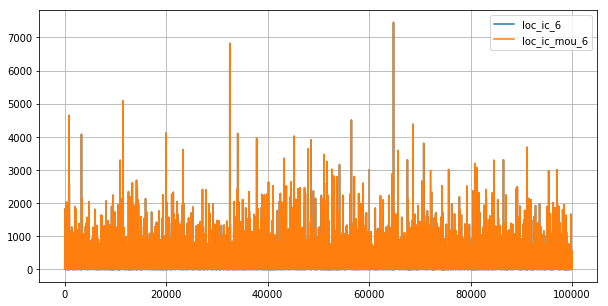

In [56]:
Churn_df[['loc_ic_6','loc_ic_mou_6']].plot(figsize=(10,5), grid=True)

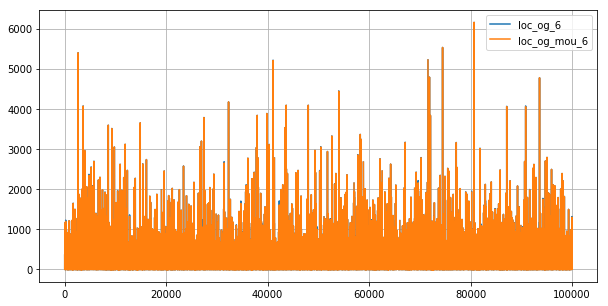

In [57]:
Churn_df[['loc_og_6','loc_og_mou_6']].plot(figsize=(10,5), grid=True)

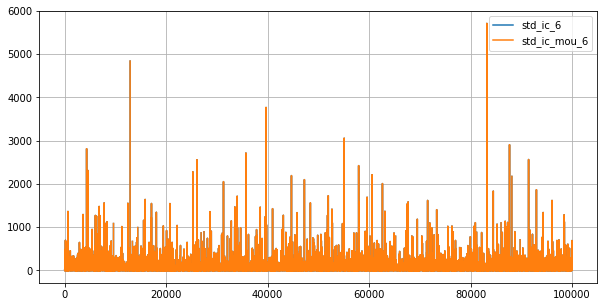

In [58]:
Churn_df[['std_ic_6','std_ic_mou_6']].plot(figsize=(10,5), grid=True)

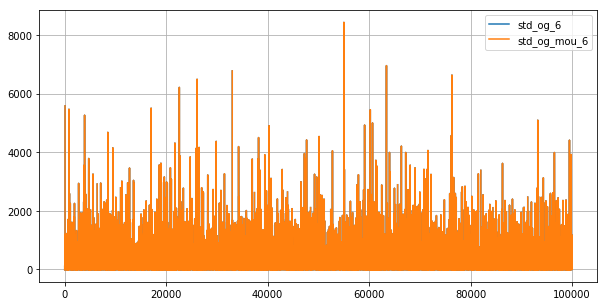

In [59]:
Churn_df[['std_og_6','std_og_mou_6']].plot(figsize=(10,5), grid=True)

In [60]:
# delete columns 
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2t')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2f')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2c')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2m')]]
Churn_df.drop(['loc_ic_6','loc_ic_7','loc_ic_8','loc_og_6','loc_og_7','loc_og_8','std_ic_6','std_ic_7','std_ic_8','std_og_6','std_og_7','std_og_8'], axis=1, inplace=True)
Churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.00,0.00,0.00,56.0,NaN,NaN,252.0,NaN,NaN,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,910.65,122.16,0.00,NaN,354.0,207.0,NaN,955.0,327.0,0
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.00,0.00,0.00,NaN,154.0,NaN,NaN,349.0,NaN,0


In [61]:
# check for columns that add up other columns
Churn_df['total_ic_6'] = Churn_df['loc_ic_mou_6'] + Churn_df['std_ic_mou_6'] + Churn_df['isd_ic_mou_6'] + Churn_df['spl_ic_mou_6'] + Churn_df['ic_others_6']
Churn_df['total_ic_7'] = Churn_df['loc_ic_mou_7'] + Churn_df['std_ic_mou_7'] + Churn_df['isd_ic_mou_7'] + Churn_df['spl_ic_mou_7'] + Churn_df['ic_others_7']
Churn_df['total_ic_8'] = Churn_df['loc_ic_mou_8'] + Churn_df['std_ic_mou_8'] + Churn_df['isd_ic_mou_8'] + Churn_df['spl_ic_mou_8'] + Churn_df['ic_others_8']

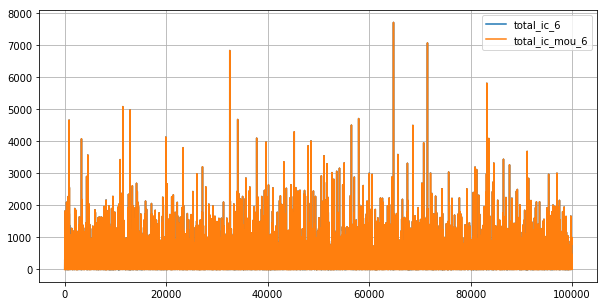

In [62]:

Churn_df[['total_ic_6','total_ic_mou_6']].plot(figsize=(10,5), grid=True)

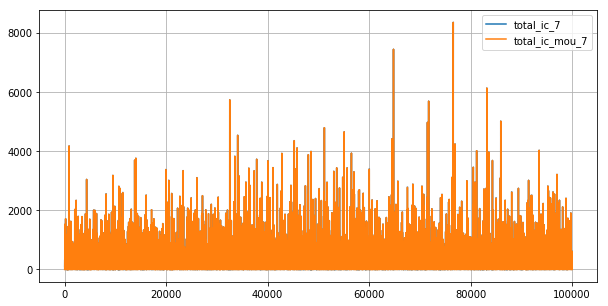

In [63]:
Churn_df[['total_ic_7','total_ic_mou_7']].plot(figsize=(10,5), grid=True)

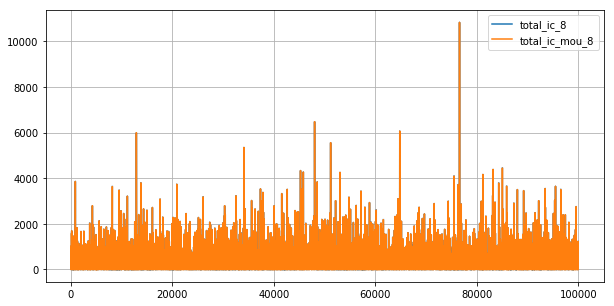

In [64]:
Churn_df[['total_ic_8','total_ic_mou_8']].plot(figsize=(10,5), grid=True)

In [65]:
# We notice that it is enough to retain the total_ic_mou_ columns and drop the individual ic_mou columns for 6,7 and 8 months
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('loc_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('std_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('isd_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('spl_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('ic_others_')]]
Churn_df.drop(['total_ic_6','total_ic_7','total_ic_8'], axis=1, inplace=True)
Churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.00,0.00,0.00,56.0,NaN,NaN,252.0,NaN,NaN,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,910.65,122.16,0.00,NaN,354.0,207.0,NaN,955.0,327.0,0
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.00,0.00,0.00,NaN,154.0,NaN,NaN,349.0,NaN,0


In [66]:
Churn_df['total_og_6'] = Churn_df['loc_og_mou_6'] + Churn_df['std_og_mou_6'] + Churn_df['isd_og_mou_6'] + Churn_df['spl_og_mou_6'] + Churn_df['og_others_6']
Churn_df['total_og_7'] = Churn_df['loc_og_mou_7'] + Churn_df['std_og_mou_7'] + Churn_df['isd_og_mou_7'] + Churn_df['spl_og_mou_7'] + Churn_df['og_others_7']
Churn_df['total_og_8'] = Churn_df['loc_og_mou_8'] + Churn_df['std_og_mou_8'] + Churn_df['isd_og_mou_8'] + Churn_df['spl_og_mou_8'] + Churn_df['og_others_8']

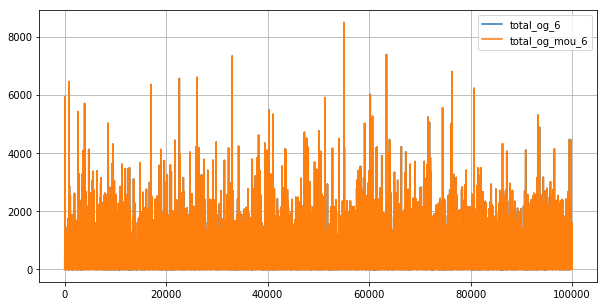

In [67]:
Churn_df[['total_og_6','total_og_mou_6']].plot(figsize=(10,5), grid=True)

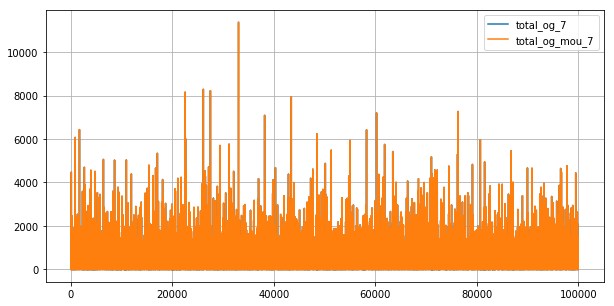

In [68]:
Churn_df[['total_og_7','total_og_mou_7']].plot(figsize=(10,5), grid=True)

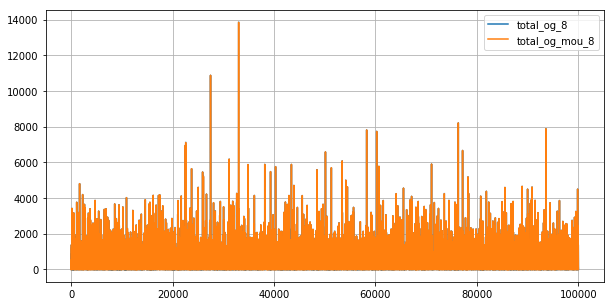

In [69]:
Churn_df[['total_og_8','total_og_mou_8']].plot(figsize=(10,5), grid=True)

In [70]:
# We notice that it is enough to retain the total_og_mou_ columns and drop the individual og_mou columns for 6,7 and 8 months
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('loc_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('std_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('isd_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('spl_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('og_others_')]]
Churn_df.drop(['total_og_6','total_og_7','total_og_8'], axis=1, inplace=True)
Churn_df = Churn_df.loc[:, (Churn_df != 0).any(axis=0)]
Churn_df.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.00,0.00,0.00,56.0,NaN,NaN,252.0,NaN,NaN,0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,910.65,122.16,0.00,NaN,354.0,207.0,NaN,955.0,327.0,0
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.00,0.00,0.00,NaN,154.0,NaN,NaN,349.0,NaN,0


In [71]:
df1 =  Churn_df.select_dtypes(include=['float64', 'int64','int','int32'])
#df1.drop('Churn',axis=1, inplace=True)
df1.head()



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,24.11,78.68,...,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,50.31,149.44,...,0.00,0.00,0.00,56.0,NaN,NaN,252.0,NaN,NaN,0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,910.65,122.16,0.00,NaN,354.0,207.0,NaN,955.0,327.0,0
9,7001864400,109,0.0,0.0,0.0,119.518,247.435,170.231,33.89,30.11,...,0.00,0.00,0.00,NaN,154.0,NaN,NaN,349.0,NaN,0


In [72]:
df1 = df1.fillna(0)
df1 = df1.loc[:, (df1 != 0).any(axis=0)]
df1.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,7000842753,109,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7001865778,109,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,...,0.00,0.00,0.00,0.0,154.0,100.0,0.0,538.0,383.0,0
4,7000142493,109,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,...,0.00,0.00,0.00,56.0,0.0,0.0,252.0,0.0,0.0,0
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,910.65,122.16,0.00,0.0,354.0,207.0,0.0,955.0,327.0,0
9,7001864400,109,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,...,0.00,0.00,0.00,0.0,154.0,0.0,0.0,349.0,0.0,0


In [73]:
df1.columns.tolist()

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',

In [74]:
#df1 = df1[df1.columns[~df1.columns.str.contains('count')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('arpu_2g')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('arpu_3g')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('max')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('sep')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('total_rech_data')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('monthly')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('last_day')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('sachet')]]          
df1.drop(['mobile_number','circle_id'], axis=1, inplace=True)
df1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,amt_data_6,amt_data_7,amt_data_8,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,...,0.00,0.00,0.00,0.0,154.0,100.0,0.0,538.0,383.0,0
4,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,...,0.00,0.00,0.00,56.0,0.0,0.0,252.0,0.0,0.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,...,910.65,122.16,0.00,0.0,354.0,207.0,0.0,955.0,327.0,0
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.0,...,0.00,0.00,0.00,0.0,154.0,0.0,0.0,349.0,0.0,0


## Univariate Analysis

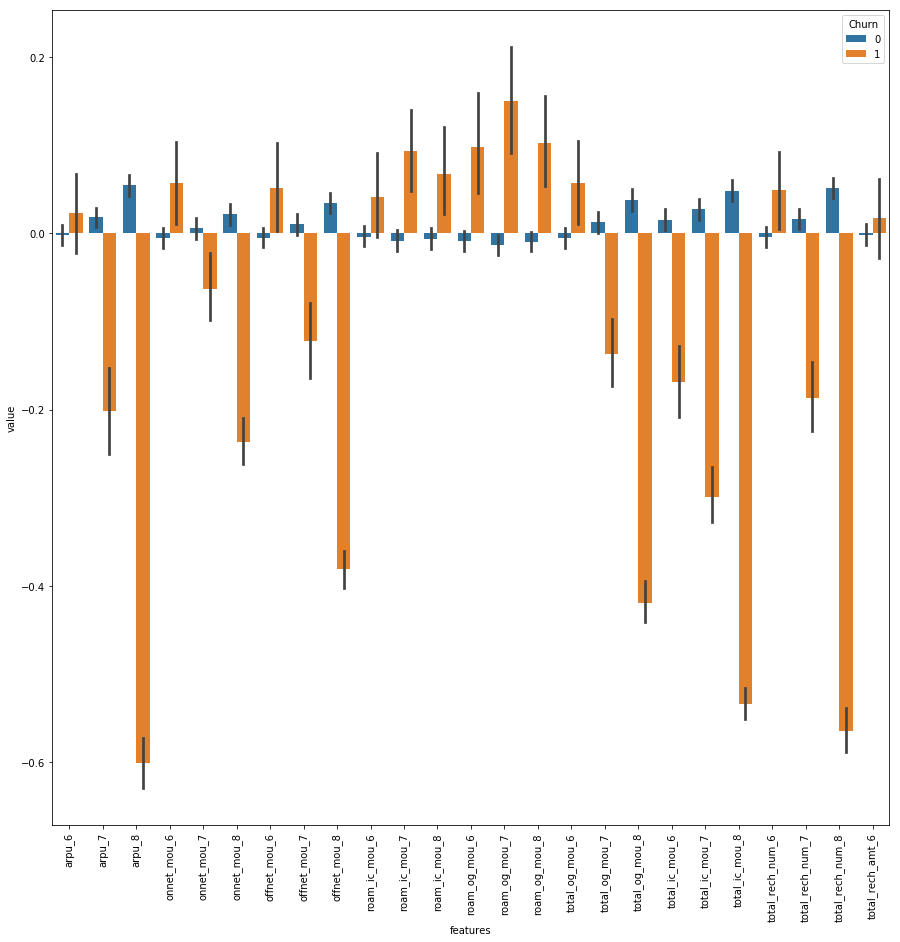

In [75]:
# replace nan with 0
df1 = df1.fillna(0)

y = df1.Churn                        

data = df1
#data_n_2 = (data - data.mean()) / (data.std()) 

df_std = (df1 - df1.mean()) / (df1.std())              # standardization

data = pd.concat([y,df_std.iloc[:,0:25]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()



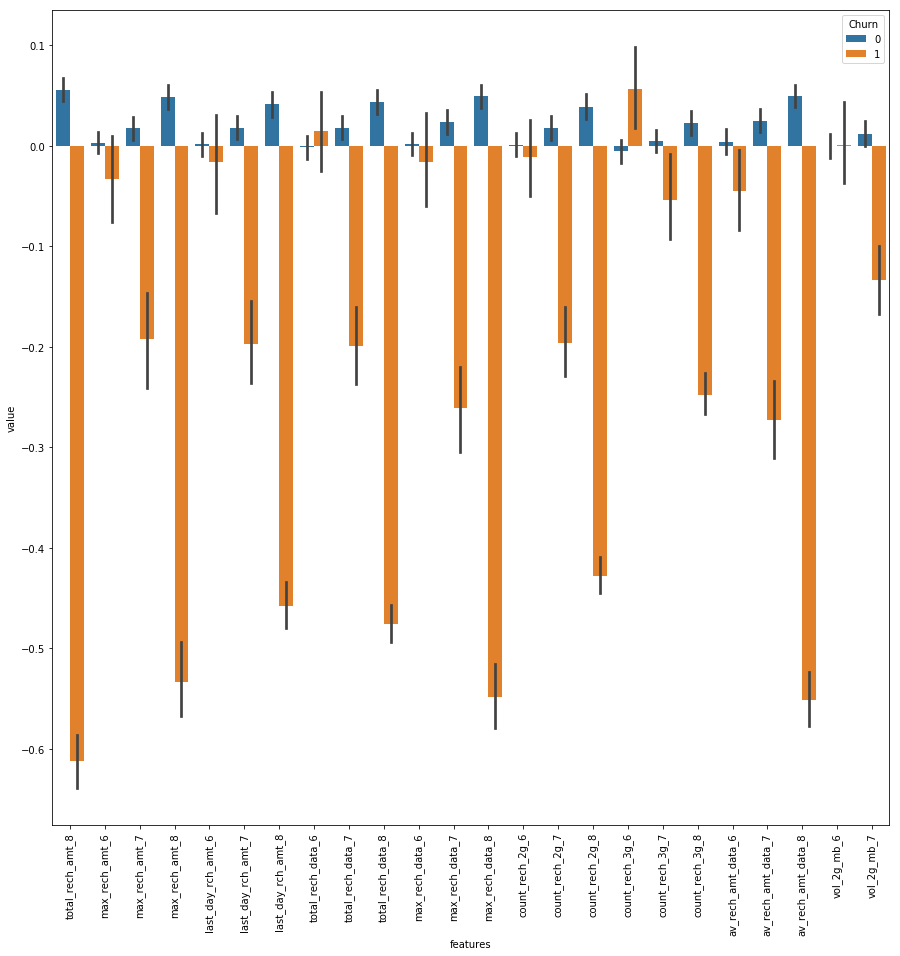

In [76]:
data = pd.concat([y,df_std.iloc[:,26:50]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()


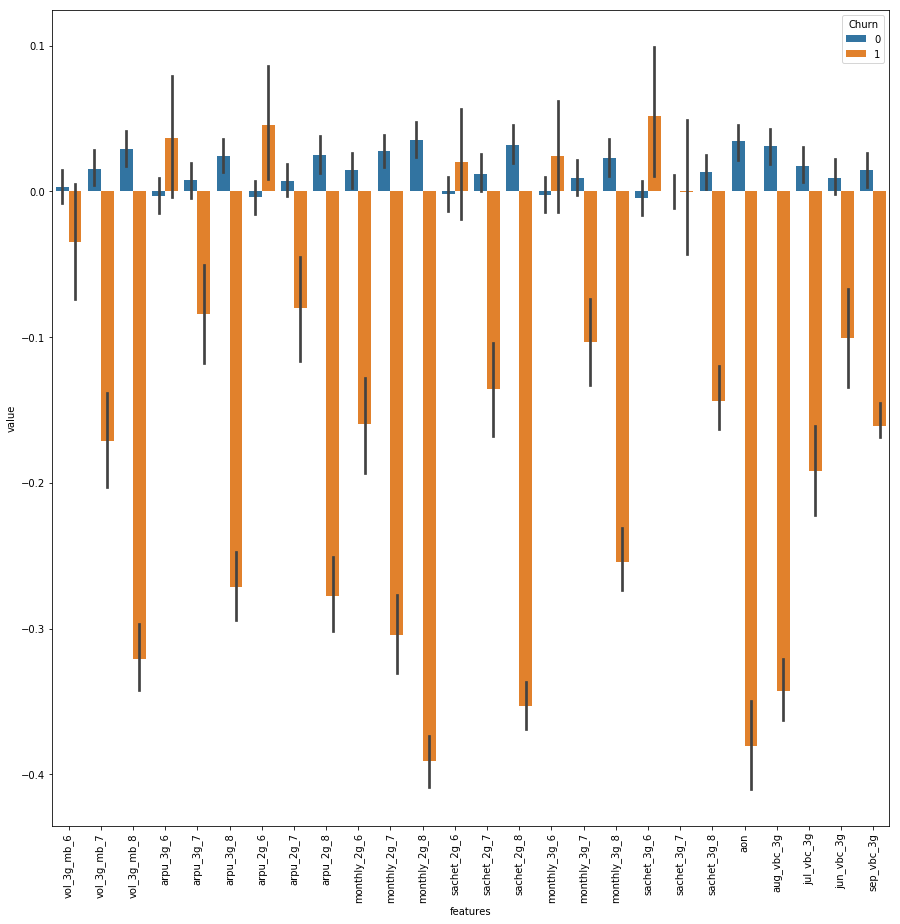

In [77]:
data = pd.concat([y,df_std.iloc[:,51:77]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()


Univariate plots are difficult to plot and analyze for such high-dimensionality data. So we proceed with plotting the heatmap to find variables that are correlated.

## Bivariate analysis (Correlation matrix)

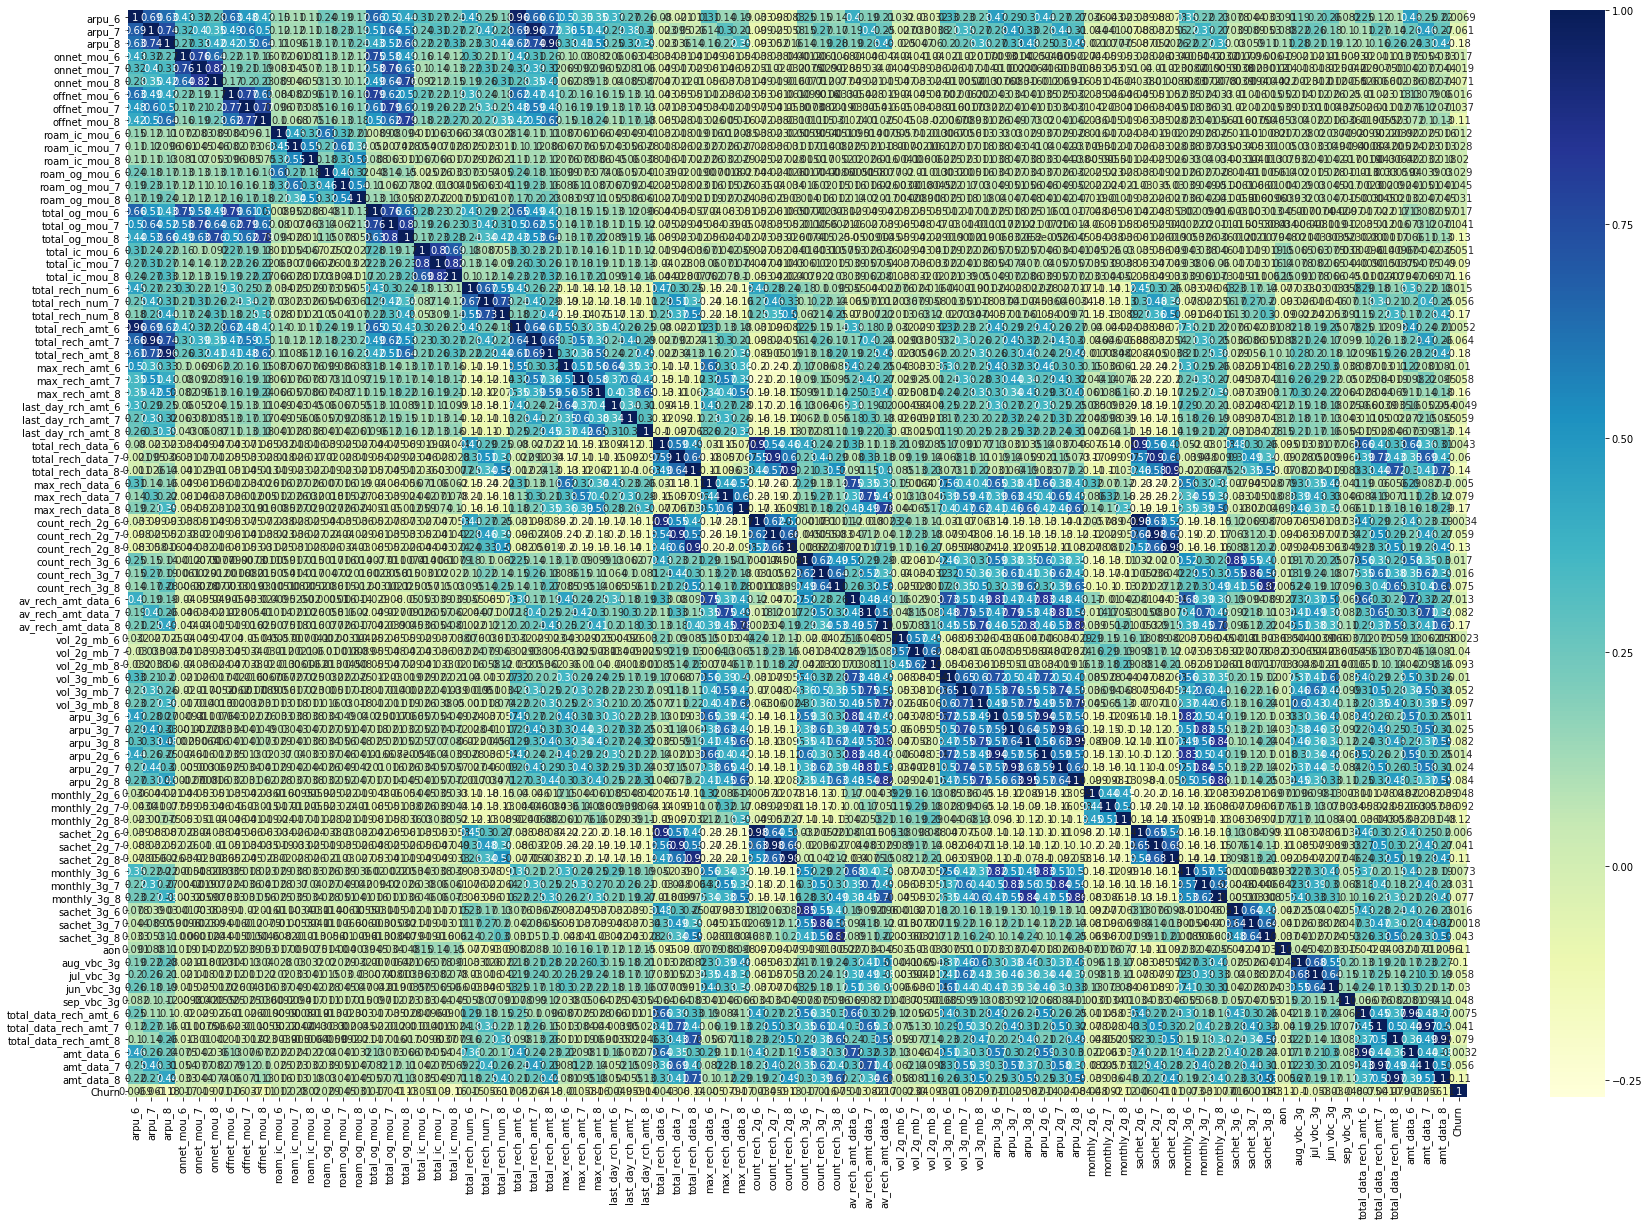

In [78]:
## collect all the numerical variables


cor = df1.corr()
cor
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [79]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print(get_top_abs_correlations(df1, 40))

count_rech_2g_8        sachet_2g_8         0.984036
count_rech_2g_7        sachet_2g_7         0.982842
count_rech_2g_6        sachet_2g_6         0.980883
total_data_rech_amt_8  amt_data_8          0.972489
total_data_rech_amt_7  amt_data_7          0.966494
arpu_7                 total_rech_amt_7    0.964220
total_data_rech_amt_6  amt_data_6          0.963977
arpu_8                 total_rech_amt_8    0.962163
arpu_6                 total_rech_amt_6    0.961166
arpu_3g_8              arpu_2g_8           0.950281
arpu_3g_6              arpu_2g_6           0.935084
arpu_3g_7              arpu_2g_7           0.933006
total_rech_data_8      count_rech_2g_8     0.902365
total_rech_data_6      count_rech_2g_6     0.901189
total_rech_data_7      count_rech_2g_7     0.898975
total_rech_data_8      sachet_2g_8         0.897927
total_rech_data_6      sachet_2g_6         0.897840
total_rech_data_7      sachet_2g_7         0.897058
count_rech_3g_8        sachet_3g_8         0.874544
count_rech_3

Following are the observations from the heatmap:

1) count_rech, sachet_rech and total_rech_data are highly correlated

2) arpu_ and total_rech_amt_ are highly correlated

3) arpu_3g and monthly_3g highly correlated

4) arpu_3g and arpu_2g are highly correlated




# Derived Variable Creation

In [80]:
Churn_df['arpu_growth_rate_past1mon'] = ((Churn_df.arpu_8 - Churn_df.arpu_7)/ Churn_df.arpu_7)
Churn_df['arpu_growth_rate_past2mon'] = ((Churn_df.arpu_7 - Churn_df.arpu_6)/ Churn_df.arpu_6)
Churn_df['arpu_3g_growth_rate_past1mon'] = ((Churn_df.arpu_3g_8 - Churn_df.arpu_3g_7)/ Churn_df.arpu_3g_7)
Churn_df['arpu_3g_growth_rate_past2mon'] = ((Churn_df.arpu_3g_7 - Churn_df.arpu_3g_6)/ Churn_df.arpu_3g_6)
Churn_df['arpu_2g_growth_rate_past1mon'] = ((Churn_df.arpu_2g_8 - Churn_df.arpu_2g_7)/ Churn_df.arpu_2g_7)
Churn_df['arpu_2g_growth_rate_past2mon'] = ((Churn_df.arpu_2g_7 - Churn_df.arpu_2g_6)/ Churn_df.arpu_2g_6)
Churn_df['rch_amt_growth_rate_past1mon'] = ((Churn_df.last_day_rch_amt_8 - Churn_df.last_day_rch_amt_7)/ Churn_df.last_day_rch_amt_7)
Churn_df['rch_amt_growth_rate_past2mon'] = ((Churn_df.last_day_rch_amt_7 - Churn_df.last_day_rch_amt_6)/ Churn_df.last_day_rch_amt_6)



In [81]:
# replace inf in derived variables with nan


Churn_df['arpu_growth_rate_past1mon'] = Churn_df['arpu_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_growth_rate_past2mon'] = Churn_df['arpu_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past1mon'] = Churn_df['arpu_3g_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past2mon'] = Churn_df['arpu_3g_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past1mon'] = Churn_df['arpu_2g_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past2mon'] = Churn_df['arpu_2g_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past1mon'] = Churn_df['rch_amt_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past2mon'] = Churn_df['rch_amt_growth_rate_past2mon'].replace(-np.inf, np.nan)

Churn_df['arpu_growth_rate_past1mon'] = Churn_df['arpu_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_growth_rate_past2mon'] = Churn_df['arpu_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past1mon'] = Churn_df['arpu_3g_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past2mon'] = Churn_df['arpu_3g_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past1mon'] = Churn_df['arpu_2g_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past2mon'] = Churn_df['arpu_2g_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past1mon'] = Churn_df['rch_amt_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past2mon'] = Churn_df['rch_amt_growth_rate_past2mon'].replace(np.inf, np.nan)


In [82]:
# replace nan with 0
Churn_df = Churn_df.fillna(0)

In [83]:
Churn_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,amt_data_8,Churn,arpu_growth_rate_past1mon,arpu_growth_rate_past2mon,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,504.0,1,-0.004716,0.088310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,383.0,0,-0.244324,9.428936,0.000000,0.000000,-0.734359,0.000000,0.304348,-0.477273
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.0,0,-0.231389,0.184378,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,327.0,0,-0.720935,0.299698,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.0,0,-0.312017,1.070274,0.000000,0.000000,0.000000,0.000000,-0.805195,0.400000
19,7001754084,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.430,241.218,...,702.0,0,0.355289,0.475971,5.606061,0.000000,-0.024299,6.109635,-1.000000,0.000000
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,979.0,0,0.892582,1.607895,-0.356525,0.000000,-0.500729,0.000000,-1.000000,0.000000
26,7000335166,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.010,130.414,...,125.0,0,-0.830632,13040.400000,0.000000,0.000000,0.000000,0.000000,-0.837662,0.000000
32,7000382876,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.651,22.064,...,0.0,1,1.374003,-0.636214,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,977.020,2362.833,...,910.0,0,-0.826805,1.418408,-0.823341,1.555738,-0.821871,1.361794,0.000000,-1.000000


In [87]:
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

In [88]:
# binary flagging for last dates
#Churn_df['last_date_of_pastmonth_3_flag'] = Churn_df.last_date_of_month_6.map( lambda x: 1 if is_date(x) else 0)-- NA as it will be always present
Churn_df['last_date_of_pastmonth_2_flag'] = Churn_df.last_date_of_month_7.map( lambda x: 1 if is_date(x) else 0)
Churn_df['last_date_of_pastmonth_1_flag'] = Churn_df.last_date_of_month_8.map( lambda x: 1 if is_date(x) else 0)

TypeError: Parser must be a string or character stream, not int

In [89]:
# binary flagging for recharge dates
#Churn_df['last_date_of_rech_pastmonth_2_flag'] = Churn_df.date_of_last_rech_7.map( lambda x: 1 if is_date(x) else 0)
#Churn_df['last_date_of_rech_pastmonth_1_flag'] = Churn_df.date_of_last_rech_8.map( lambda x: 1 if is_date(x) else 0)

In [90]:
Churn_df['last_date_of_pastmonth_1_flag']

KeyError: 'last_date_of_pastmonth_1_flag'

In [91]:
from datetime import datetime
Churn_df['rechg_past1month_days'] = (pd.to_datetime(Churn_df.date_of_last_rech_7) - pd.to_datetime(Churn_df.date_of_last_rech_6)).dt.days
Churn_df['rechg_past2month_days'] = (pd.to_datetime(Churn_df.date_of_last_rech_8) - pd.to_datetime(Churn_df.date_of_last_rech_7)).dt.days

In [92]:
Churn_df['avg_rechg_days'] = ((Churn_df.rechg_past1month_days + Churn_df.rechg_past2month_days)/2)
Churn_df['diff_rechg_days'] = Churn_df['rechg_past2month_days'] - Churn_df['rechg_past1month_days']

In [93]:
Churn_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25,23,24.0,-2
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.000000,0.000000,-0.734359,0.000000,0.304348,-0.477273,32,28,30.0,-4
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,32,12,22.0,-20
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,36,30,33.0,-6
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.000000,0.000000,0.000000,0.000000,-0.805195,0.400000,24,37,30.5,13
19,7001754084,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.430,241.218,...,5.606061,0.000000,-0.024299,6.109635,-1.000000,0.000000,28,32,30.0,4
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,-0.356525,0.000000,-0.500729,0.000000,-1.000000,0.000000,19,48,33.5,29
26,7000335166,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.010,130.414,...,0.000000,0.000000,0.000000,0.000000,-0.837662,0.000000,16278,29,8153.5,-16249
32,7000382876,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.651,22.064,...,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,22,34,28.0,12
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,977.020,2362.833,...,-0.823341,1.555738,-0.821871,1.361794,0.000000,-1.000000,30,27,28.5,-3


In [94]:
Churn_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'arpu_3g_growth_rate_past1mon', 'arpu_3g_growth_rate_past2mon',
       'arpu_2g_growth_rate_past1mon', 'arpu_2g_growth_rate_past2mon',
       'rch_amt_growth_rate_past1mon', 'rch_amt_growth_rate_past2mon',
       'rechg_past1month_days', 'rechg_past2month_days', 'avg_rechg_days',
       'diff_rechg_days'],
      dtype='object', length=110)

In [95]:
Churn_df.columns[(Churn_df == 0).all()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [96]:
Churn_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25,23,24.0,-2
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,...,0.000000,0.000000,-0.734359,0.000000,0.304348,-0.477273,32,28,30.0,-4
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,32,12,22.0,-20
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,36,30,33.0,-6
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,0.000000,0.000000,0.000000,0.000000,-0.805195,0.400000,24,37,30.5,13
19,7001754084,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.430,241.218,...,5.606061,0.000000,-0.024299,6.109635,-1.000000,0.000000,28,32,30.0,4
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,-0.356525,0.000000,-0.500729,0.000000,-1.000000,0.000000,19,48,33.5,29
26,7000335166,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.010,130.414,...,0.000000,0.000000,0.000000,0.000000,-0.837662,0.000000,16278,29,8153.5,-16249
32,7000382876,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.651,22.064,...,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,22,34,28.0,12
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,977.020,2362.833,...,-0.823341,1.555738,-0.821871,1.361794,0.000000,-1.000000,30,27,28.5,-3


# Dealing with imbalanced class

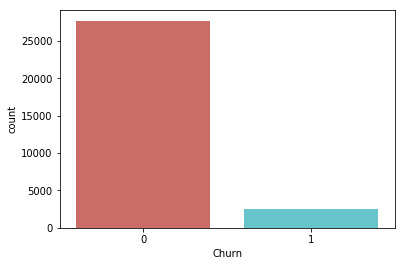

In [97]:
sns.countplot(x=Churn_df.Churn,data=Churn_df, palette='hls')
plt.show()

In [98]:
Churn_df.Churn.value_counts()

0    27681
1     2514
Name: Churn, dtype: int64

## Over-sampling using SMOTE

In [99]:
Churn_df = Churn_df.fillna(0)

# delete columns with all 0
Churn_df = Churn_df.loc[:, (Churn_df != 0).any(axis=0)]
Churn_df = Churn_df.set_index('mobile_number')
Churn_df.head()



,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,25,23,24.0,-2
7001865778,109,6/30/2014,7/31/2014,8/31/2014,34.047,355.074,268.321,24.11,78.68,7.68,...,0.0,0.0,-0.734359,0.0,0.304348,-0.477273,32,28,30.0,-4
7000142493,109,6/30/2014,7/31/2014,8/31/2014,261.636,309.876,238.174,50.31,149.44,83.89,...,0.0,0.0,0.000000,0.0,0.000000,1.200000,32,12,22.0,-20
7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,0.0,0.0,0.000000,0.0,0.000000,-1.000000,36,30,33.0,-6
7001864400,109,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,170.231,33.89,30.11,22.43,...,0.0,0.0,0.000000,0.0,-0.805195,0.400000,24,37,30.5,13


In [100]:
list = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7',
'date_of_last_rech_8']
smote_df = Churn_df.drop(list,axis = 1 )

In [101]:
X = smote_df.loc[:, smote_df.columns != 'Churn']
y = smote_df.loc[:, smote_df.columns == 'Churn']

In [102]:

!pip install -U imbalanced-learn
!pip install imblearn

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

bal_x_train,bal_y_train =os.fit_sample(X_train, y_train)
bal_x_train = pd.DataFrame(data=bal_x_train,columns=columns )
bal_y_train= pd.DataFrame(data=bal_y_train,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(bal_x_train))
print("Number of no churn in oversampled data",len(bal_y_train[bal_y_train['y']==0]))
print("Number of churn",len(bal_x_train[bal_y_train['y']==1]))
print("Proportion of no churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==0])/len(bal_x_train))
print("Proportion of churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==1])/len(bal_x_train))

Requirement already up-to-date: imbalanced-learn in c:\users\np00544400\appdata\local\continuum\anaconda3\lib\site-packages (0.4.3)


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  38758
Number of no churn in oversampled data 19379
Number of churn 19379
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [103]:
bal_x_train.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
0,109.0,175.381,443.494,309.584,59.04,58.63,18.96,165.89,362.14,418.74,...,0.00,0.000000,0.000000,0.0,-0.738462,0.000000,34.0,33.0,33.5,-1.0
1,109.0,598.892,399.120,536.136,160.46,155.44,137.61,545.99,515.64,488.39,...,0.00,0.000000,0.000000,-1.0,-1.000000,8.238806,30.0,33.0,31.5,3.0
2,109.0,610.224,330.753,374.934,129.46,119.96,115.93,172.01,201.33,142.86,...,0.00,0.000000,0.000000,0.0,0.000000,-0.007937,31.0,21.0,26.0,-10.0
3,109.0,384.154,253.500,573.847,22.81,23.33,36.74,66.06,137.98,141.44,...,0.53,-0.190345,0.021681,0.0,0.000000,-1.000000,20.0,46.0,33.0,26.0
4,109.0,237.723,132.644,229.129,11.56,7.58,2.99,90.21,56.53,21.09,...,0.00,0.000000,0.000000,0.0,-0.600000,-0.583333,33.0,31.0,32.0,-2.0


In [104]:
X_test.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001056228,109,64.675,43.979,109.884,6.06,0.00,0.95,8.06,2.00,9.08,...,-1.000000,-0.748060,130.250000,-0.997431,0.00000,0.000000,48,31,39.5,-17
7001454755,109,269.492,254.485,326.339,23.78,30.23,87.64,36.69,27.21,85.68,...,-0.193752,0.539338,0.000000,-0.093278,0.00000,-1.000000,35,34,34.5,-1
7001396262,109,413.234,133.918,351.460,1366.18,714.86,745.89,140.24,19.66,50.01,...,0.000000,0.000000,0.000000,0.000000,-1.00000,-0.509804,16,46,31.0,30
7001137904,109,1231.114,1140.364,1015.453,276.03,334.03,315.74,430.39,356.86,371.33,...,-0.012490,-0.081584,0.018651,-0.123672,0.96875,0.066667,32,29,30.5,-3
7000514999,109,199.675,147.231,545.113,53.16,6.68,127.84,16.54,14.36,87.78,...,0.000000,0.000000,-0.230629,3.077496,1.00000,-0.411765,28,33,30.5,5


In [105]:
#create dummies
bal_x_train=pd.get_dummies(bal_x_train)
X_test=pd.get_dummies(X_test)
bal_x_train.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
0,109.0,175.381,443.494,309.584,59.04,58.63,18.96,165.89,362.14,418.74,...,0.00,0.000000,0.000000,0.0,-0.738462,0.000000,34.0,33.0,33.5,-1.0
1,109.0,598.892,399.120,536.136,160.46,155.44,137.61,545.99,515.64,488.39,...,0.00,0.000000,0.000000,-1.0,-1.000000,8.238806,30.0,33.0,31.5,3.0
2,109.0,610.224,330.753,374.934,129.46,119.96,115.93,172.01,201.33,142.86,...,0.00,0.000000,0.000000,0.0,0.000000,-0.007937,31.0,21.0,26.0,-10.0
3,109.0,384.154,253.500,573.847,22.81,23.33,36.74,66.06,137.98,141.44,...,0.53,-0.190345,0.021681,0.0,0.000000,-1.000000,20.0,46.0,33.0,26.0
4,109.0,237.723,132.644,229.129,11.56,7.58,2.99,90.21,56.53,21.09,...,0.00,0.000000,0.000000,0.0,-0.600000,-0.583333,33.0,31.0,32.0,-2.0


In [106]:
X_test.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_3g_growth_rate_past1mon,arpu_3g_growth_rate_past2mon,arpu_2g_growth_rate_past1mon,arpu_2g_growth_rate_past2mon,rch_amt_growth_rate_past1mon,rch_amt_growth_rate_past2mon,rechg_past1month_days,rechg_past2month_days,avg_rechg_days,diff_rechg_days
mobile_number,,,,,,,,,,,,,,,,,,,,,
7001056228,109,64.675,43.979,109.884,6.06,0.00,0.95,8.06,2.00,9.08,...,-1.000000,-0.748060,130.250000,-0.997431,0.00000,0.000000,48,31,39.5,-17
7001454755,109,269.492,254.485,326.339,23.78,30.23,87.64,36.69,27.21,85.68,...,-0.193752,0.539338,0.000000,-0.093278,0.00000,-1.000000,35,34,34.5,-1
7001396262,109,413.234,133.918,351.460,1366.18,714.86,745.89,140.24,19.66,50.01,...,0.000000,0.000000,0.000000,0.000000,-1.00000,-0.509804,16,46,31.0,30
7001137904,109,1231.114,1140.364,1015.453,276.03,334.03,315.74,430.39,356.86,371.33,...,-0.012490,-0.081584,0.018651,-0.123672,0.96875,0.066667,32,29,30.5,-3
7000514999,109,199.675,147.231,545.113,53.16,6.68,127.84,16.54,14.36,87.78,...,0.000000,0.000000,-0.230629,3.077496,1.00000,-0.411765,28,33,30.5,5


# Dimensionality Reduction using PCA 

In [107]:
#standardizing values
bal_x_train = (bal_x_train-bal_x_train.mean())/bal_x_train.std()


In [108]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [109]:
#Doing the PCA on the train data
bal_x_train = bal_x_train.fillna(0)
pca.fit(bal_x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [110]:
pca.components_

array([[ 9.96081536e-17,  1.23956327e-01,  1.46850129e-01, ...,
         3.18575220e-02,  3.96935583e-02,  1.60003552e-02],
       [ 7.72092812e-18, -6.17276483e-02, -4.10791676e-02, ...,
         2.09213287e-02,  2.10996921e-02,  1.47857832e-02],
       [ 3.58287544e-18,  1.58423776e-01,  1.85415842e-01, ...,
         4.07095217e-02,  4.54273325e-02,  2.50067164e-02],
       ...,
       [ 0.00000000e+00, -6.41325244e-17,  8.11366916e-17, ...,
        -3.72144154e-01,  1.79869349e-01,  2.63623454e-01],
       [-0.00000000e+00,  9.06841465e-17, -1.33442469e-16, ...,
        -2.91172812e-01,  6.08758025e-01, -3.37200892e-01],
       [-1.00000000e+00,  1.41474935e-15,  2.79437411e-15, ...,
         6.29807285e-17,  1.37426379e-16, -1.91386608e-17]])

In [1496]:
colnames = list(bal_x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

TypeError: 'list' object is not callable

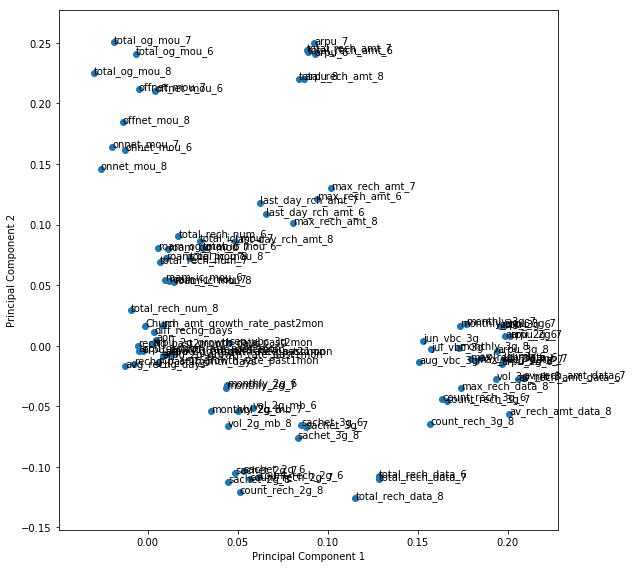

In [1497]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [1498]:
pca.explained_variance_ratio_

array([1.83878244e-01, 9.56985410e-02, 9.10928527e-02, 5.12339202e-02,
       4.19814717e-02, 3.38769796e-02, 3.12505804e-02, 2.83846963e-02,
       2.71672497e-02, 2.54316566e-02, 2.30993699e-02, 2.06633125e-02,
       1.71544532e-02, 1.69719986e-02, 1.52727645e-02, 1.51571599e-02,
       1.41241674e-02, 1.23586614e-02, 1.22015531e-02, 1.13883569e-02,
       1.13071797e-02, 1.12231686e-02, 1.11356388e-02, 1.10437187e-02,
       1.09169208e-02, 1.06010440e-02, 1.05094481e-02, 1.03454087e-02,
       9.80888014e-03, 9.09515200e-03, 8.29638141e-03, 8.28866414e-03,
       7.45969367e-03, 6.95163831e-03, 6.47241252e-03, 6.01634855e-03,
       5.80101195e-03, 5.41732979e-03, 5.36627285e-03, 4.93790232e-03,
       4.78066066e-03, 4.18356468e-03, 3.97074493e-03, 3.44663405e-03,
       3.36503552e-03, 3.26832585e-03, 2.92359121e-03, 2.87898383e-03,
       2.66654232e-03, 2.43979872e-03, 2.17973295e-03, 2.13480056e-03,
       1.96557720e-03, 1.87655539e-03, 1.59396143e-03, 1.50895540e-03,
      

In [1499]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 18.39,  27.96,  37.07,  42.19,  46.39,  49.78,  52.91,  55.75,
        58.47,  61.01,  63.32,  65.39,  67.11,  68.81,  70.34,  71.86,
        73.27,  74.51,  75.73,  76.87,  78.  ,  79.12,  80.23,  81.33,
        82.42,  83.48,  84.53,  85.56,  86.54,  87.45,  88.28,  89.11,
        89.86,  90.56,  91.21,  91.81,  92.39,  92.93,  93.47,  93.96,
        94.44,  94.86,  95.26,  95.6 ,  95.94,  96.27,  96.56,  96.85,
        97.12,  97.36,  97.58,  97.79,  97.99,  98.18,  98.34,  98.49,
        98.63,  98.76,  98.89,  99.01,  99.13,  99.24,  99.35,  99.45,
        99.54,  99.62,  99.69,  99.76,  99.82,  99.87,  99.91,  99.95,
        99.98, 100.01, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03, 100.03, 100.03])

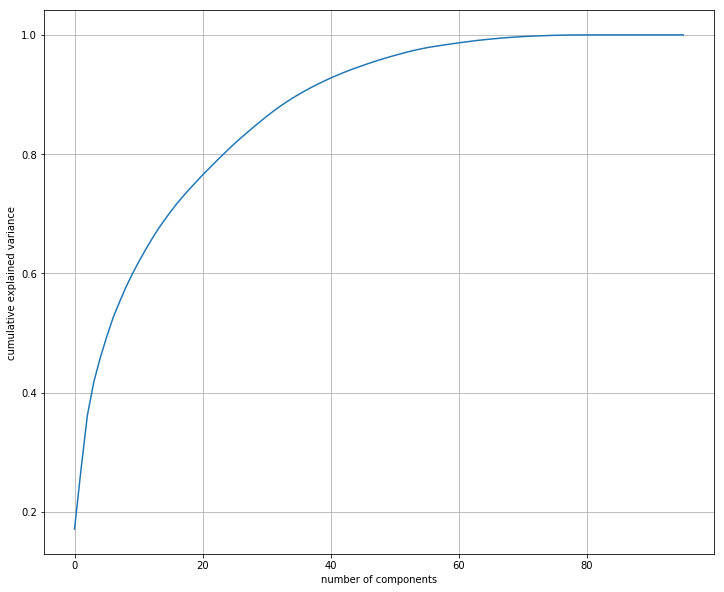

In [111]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

##### We find that 34 variables can explain about 90% of the variance in the dataset. So we chose to proceed with 34 variables.

In [112]:
#incremental PCA 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=34)
n_components = 34

In [113]:
xtrain_pca = pca_final.fit_transform(bal_x_train)
xtrain_pca.shape

(38758, 34)

In [114]:
#Churn_df_pca = pd.DataFrame(Churn_pca, columns=['PCA%i' % i for i in range(n_components)], index=x_train.index)
#Churn_df_pca.head()

In [115]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(xtrain_pca.transpose())

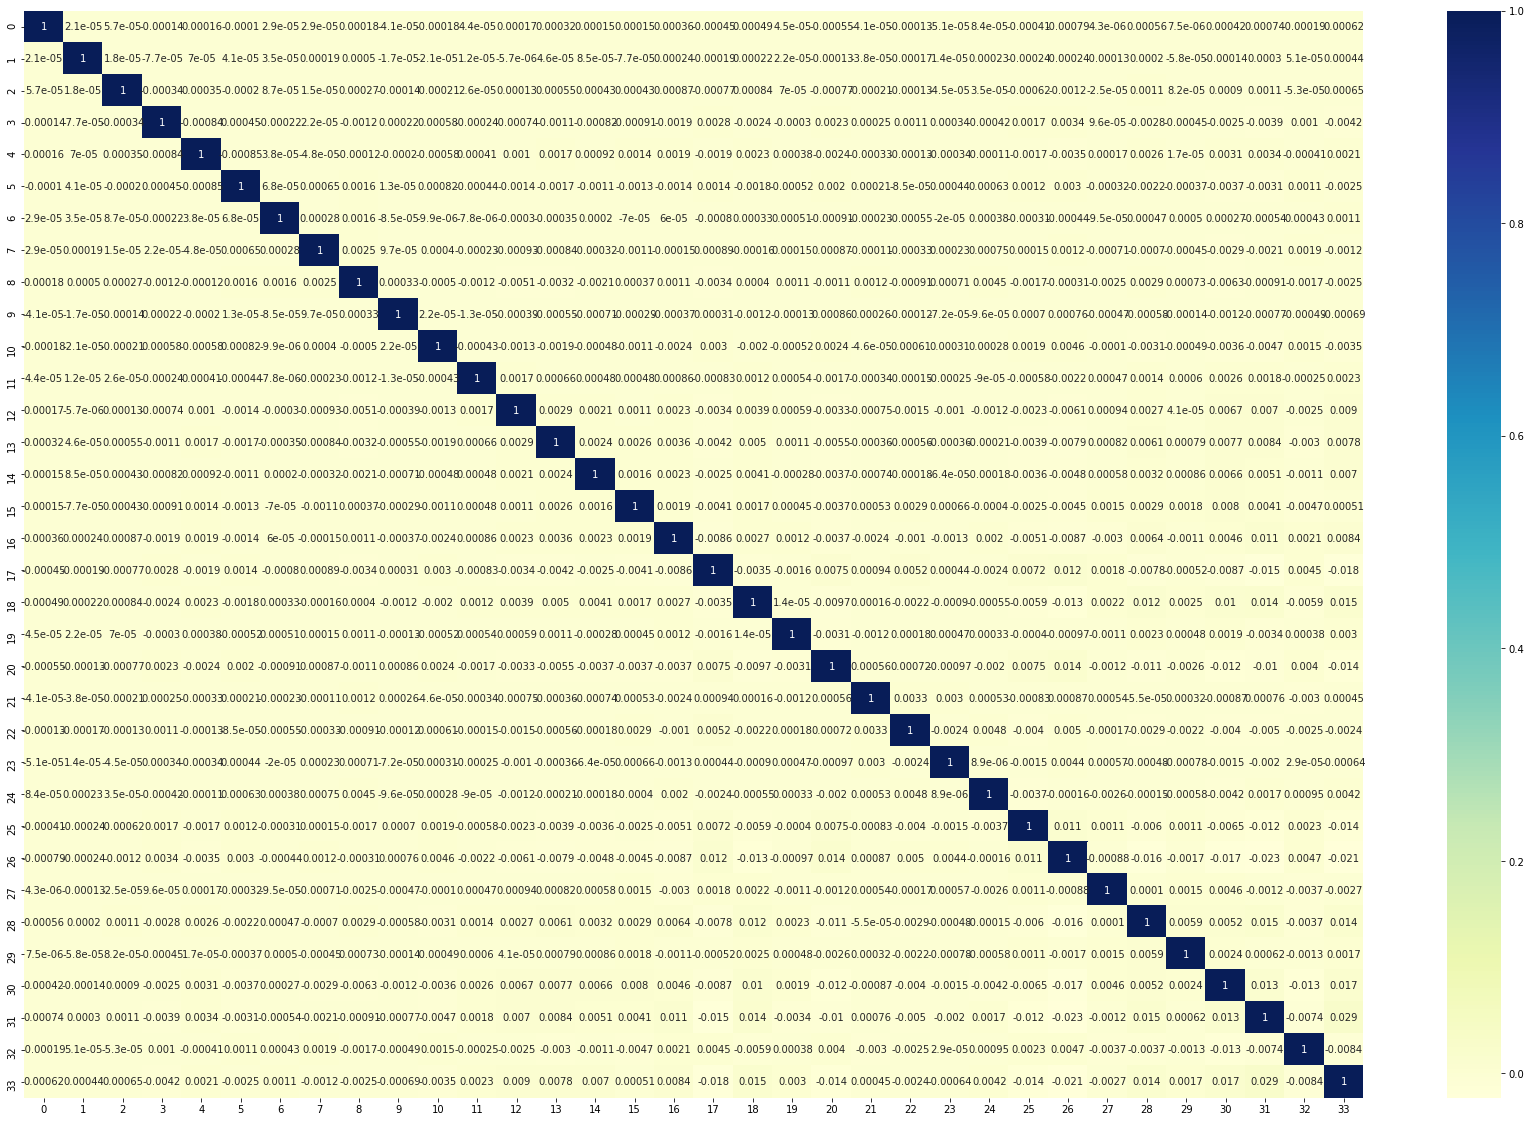

In [116]:
#plotting the correlation matrix to show that there are no variables that are highly correlated
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(corrmat,cmap="YlGnBu",annot = True)

In [117]:
xtest_pca = pca_final.fit_transform(X_test)
xtest_pca.shape

(9059, 34)

# Logistic regression model

In [118]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
model_pca = logreg.fit(xtrain_pca,bal_y_train)


C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
#Making prediction on the test data
#pred_probs_test = model_pca.predict_proba(xtest_pca)[:,1]
#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [120]:
y_pred = logreg.predict(xtest_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xtest_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [121]:
pca_again = PCA(0.95)

In [122]:
xtrain_pca2 = pca_again.fit_transform(bal_x_train)
xtrain_pca2.shape
# we see that PCA selected 14 components

(38758, 47)

In [123]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(xtrain_pca2,bal_y_train)

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
xtest_pca2 = pca_again.transform(X_test)
xtest_pca2.shape

(9059, 47)

In [125]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(xtest_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


'0.76'

In [126]:

logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(xtrain_pca2,bal_y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True False False  True  True False False False False False False  True
 False  True False False False False False False  True False False False
 False False False  True False False False  True False False  True False
 False False False False False False False False  True False False]
[ 1 26 11  1  1 36 16  8 21  4 31  1  3  1 37 12 17  9 38  6  1 23 14 30
 29  5 22  1 15 34 13  1  2  7  1 33 24 20 35 19 10 27 28 32  1 18 25]


C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
train_pca_df = pd.DataFrame(xtrain_pca2)


In [133]:
cols = [0,3,4,11,13,20,27,31,34,44]

X=train_pca_df[cols]
y=bal_y_train

### Implementing the Logistic Regression model

In [134]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.480242
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000    
Dependent Variable: y                Pseudo R-squared: 0.307     
Date:               2018-11-15 00:00 AIC:              37246.4576
No. Observations:   38758            BIC:              37332.1085
Df Model:           9                Log-Likelihood:   -18613.   
Df Residuals:       38748            LL-Null:          -26865.   
Converged:          1.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
0        -0.2565     0.0044   -58.6409   0.0000   -0.2651   -0.2480
3         0.5545     0.0075    73.7497   0.0000    0.5397    0.5692
4         0.4692     0.0082    57.2449   0.0000    0.453

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NP00544400\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


# Ensemble techinque to be used once variable reduction is completed as data is imbalance

In [299]:
# Ensemble Technique for imbalanced data - Random forest
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

ValueError: Number of features of the model must match the input. Model n_features is 89 and input n_features is 95 

In [ ]:
# Ensemble Technique for imbalanced data - AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

In [ ]:
# Ensemble Technique for imbalanced data - GardientBoost
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

# Confusion Matrix to check model accuracy

# Final Model Select

# Predict Month-9 data using Final selected model